In [7]:
years = [2014,2015,2016,2017,2018, 2019, 2020, 2021, 2022, 2023, 2024]
all_data = []


In [8]:
import pandas as pd

for year in years:
    try:
        svc_path = f"data_extracted/sample_svcg_{year}.txt"
        orig_path = f"data_extracted/sample_orig_{year}.txt"


        # Load servicing
        svc = pd.read_csv(svc_path, delimiter='|', header=None, low_memory=False)
        svc.columns = [f'col_{i}' for i in range(svc.shape[1])]
        svc = svc[['col_0', 'col_21']].rename(columns={'col_0': 'LOAN_ID', 'col_21': 'ACTUAL_LOSS'})
        svc = svc.dropna(subset=['ACTUAL_LOSS'])
        svc = svc[svc['ACTUAL_LOSS'] != 0]

        # Load origination
        orig = pd.read_csv(orig_path, delimiter='|', header=None, low_memory=False)
        orig.columns = [f'col_{i}' for i in range(orig.shape[1])]
        orig = orig[['col_19', 'col_16']].rename(columns={'col_19': 'LOAN_ID', 'col_16': 'PROPERTY_STATE'})
        orig['LOAN_ID'] = orig['LOAN_ID'].astype(str)

        # Merge
        merged = pd.merge(svc, orig, on='LOAN_ID', how='inner')
        all_data.append(merged)

        print(f"✅ Year {year}: {merged.shape[0]} rows")

    except Exception as e:
        print(f"⚠️ Skipped {year}: {e}")


✅ Year 2014: 188 rows
✅ Year 2015: 97 rows
✅ Year 2016: 71 rows
✅ Year 2017: 83 rows
✅ Year 2018: 40 rows
✅ Year 2019: 20 rows
✅ Year 2020: 5 rows
✅ Year 2021: 3 rows
✅ Year 2022: 6 rows
✅ Year 2023: 0 rows
✅ Year 2024: 0 rows


In [9]:
all_years_df = pd.concat(all_data, ignore_index=True)

avg_loss_all_years = (
    all_years_df.groupby('PROPERTY_STATE')['ACTUAL_LOSS']
    .mean()
    .reset_index()
    .sort_values(by='ACTUAL_LOSS', ascending=False)
)

print(avg_loss_all_years)


   PROPERTY_STATE    ACTUAL_LOSS
46             WY   18206.620000
25             ND   18156.540000
27             NH   -3546.040000
7              DE   -4368.960000
2              AR   -6544.128889
43             WA   -8291.305000
1              AL   -9551.732000
36             RI  -10254.530000
5              CO  -10650.245000
45             WV  -11850.630000
44             WI  -12186.091111
33             OR  -12377.250000
14             IN  -12506.133750
16             KY  -13662.946250
39             TX  -15001.056562
38             TN  -15600.565000
29             NV  -15972.670000
37             SC  -16517.958333
20             MI  -16678.176207
17             LA  -18113.616667
15             KS  -19953.336667
4              CA  -22537.413103
9              GA  -22770.820909
12             ID  -22786.546000
31             OH  -23571.146552
22             MO  -24618.968000
28             NJ  -25158.675385
21             MN  -25433.361667
11             IA  -26102.088889
18        

In [10]:
state_name_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia',
    'PR': 'Puerto Rico', 'GU': 'Guam', 'VI': 'Virgin Islands'
}


In [11]:
# Split into two columns for legend display
state_items = list(state_name_mapping.items())
mid_index = len(state_items) // 2
left_states = state_items[:mid_index]
right_states = state_items[mid_index:]

# Format legend text
left_legend = "\n".join([f"{abbr}: {name}" for abbr, name in left_states])
right_legend = "\n".join([f"{abbr}: {name}" for abbr, name in right_states])


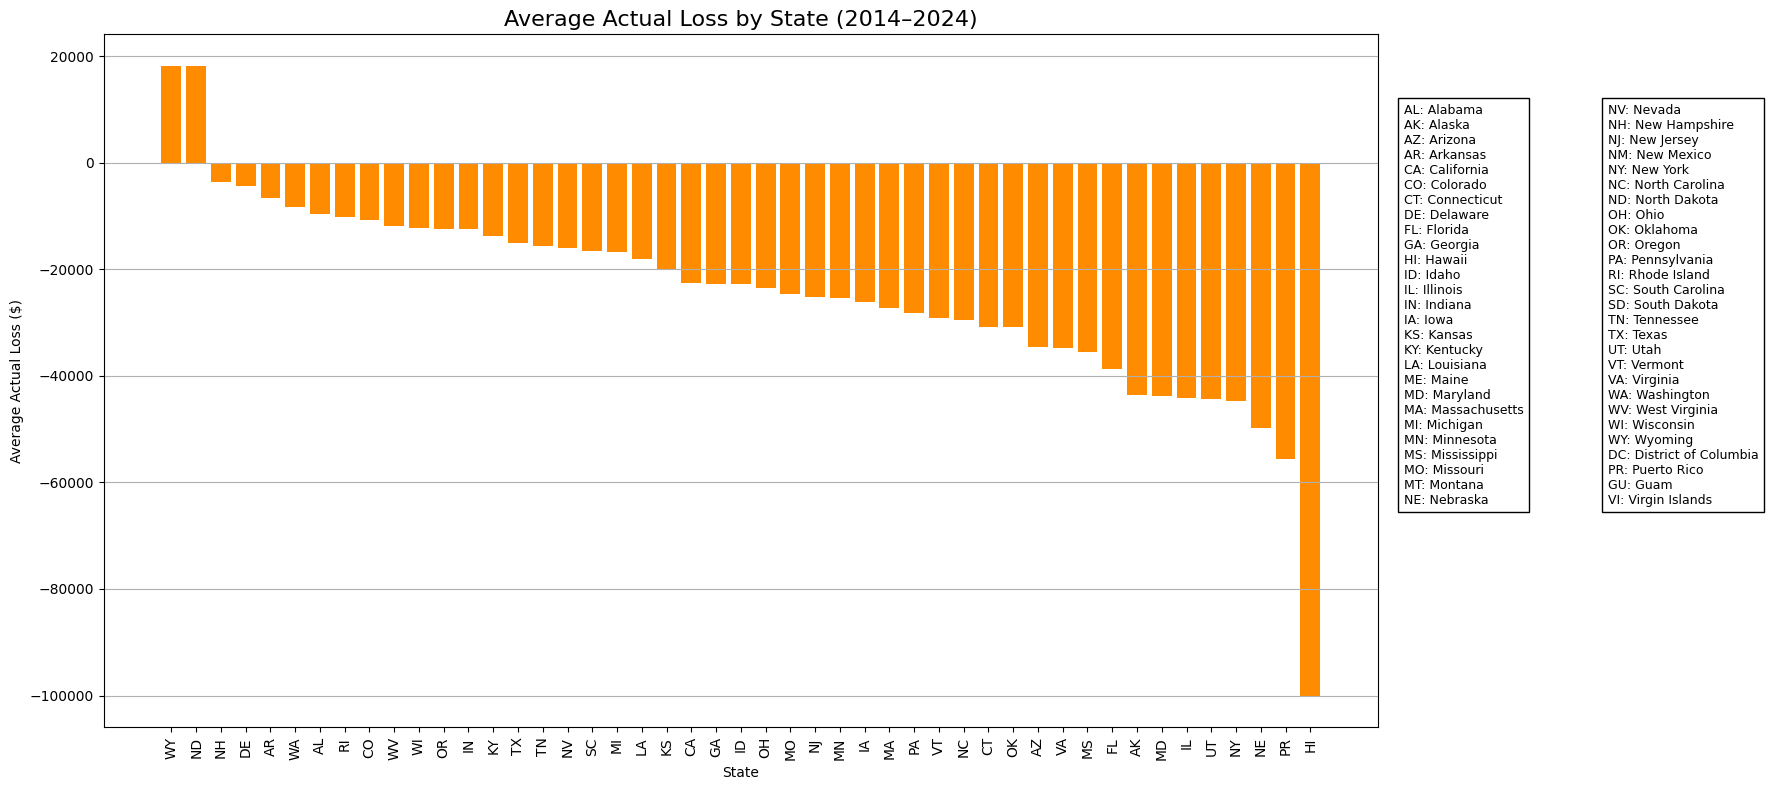

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.bar(avg_loss_all_years['PROPERTY_STATE'], avg_loss_all_years['ACTUAL_LOSS'], color='darkorange')
plt.xlabel('State')
plt.ylabel('Average Actual Loss ($)')
plt.title('Average Actual Loss by State (2014–2024)', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Add text legend boxes
plt.text(1.02, 0.9, left_legend, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.text(1.18, 0.9, right_legend, transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

